# Motivation

A standard neural network like a MLP has problems to learn to multiply two input numbers x1,x2!

Reason:
$y = x1*x2$ cannot be simulated using linear layers.


# Example

Here we try to learn the multiplication with a standard MLP and show that is does not work.

In [29]:
import torch
import numpy
import matplotlib.pyplot as plt

def get_ground_truth_output_from_input_tensor(input_vec):
    x1 = input_vec[0].item()
    x2 = input_vec[1].item()
    
    # target is x1*x2
    return torch.tensor( [x1*x2] )


class net1(torch.nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        
        super().__init__()
        self.layer1 = torch.nn.Linear(input_size, hidden_size)
        self.layer2 = torch.nn.Linear(hidden_size, output_size)        
        
    def forward(self, input_vec):
        
        out1 = self.layer1(input_vec)
        out2 = self.layer2(out1)
        return out2

    
def learn(net, nr_train_steps):

    loss_fn = torch.nn.L1Loss()
    optimizer = torch.optim.SGD(net.parameters(), lr=0.001)

    list_of_errors = []
    list_of_avg_errors = []

    for train_step in range(nr_train_steps):

        if train_step % (nr_train_steps/10) == 0:
            print("train_step=", train_step)

        # generate a training sample
        x1 = numpy.random.uniform(low=0.0, high=10.0)
        x2 = numpy.random.uniform(low=0.0, high=10.0)
        input_vec   = torch.tensor([x1,x2])        
        teacher_vec = get_ground_truth_output_from_input_tensor( input_vec )
        #print( f"{input_vec} --> {teacher_vec}" )

        # forward step
        y_pred = net(input_vec)
        
        # compute loss
        loss = loss_fn(y_pred, teacher_vec)

        # save current loss for plotting it later
        error = abs(teacher_vec-y_pred)
        list_of_errors.append( error.item() )

        if len(list_of_errors) > 100 :
            list_of_avg_errors.append( numpy.mean(list_of_errors[-100:]) )

        # backward step -> computes gradients
        net.zero_grad()
        loss.backward()

        # optimizer step -> adapts weights
        optimizer.step()

        if False:
            error = abs(teacher_vec-y_pred)
            print( f"teacher={teacher_vec}, predicted={y_pred:} -> error={error}" )
        
    plt.plot( list_of_avg_errors )
    plt.show()
    
    print("Testing:")
    numbers = [0, 0.5, 1.0, 2.0, 3.0, 4.0]
    for x1 in numbers:
        for x2 in numbers:
            input_vec = torch.tensor([x1,x2], dtype=torch.float32)
            y_pred = net(input_vec)
            print( f"{x1}*{x2} is {x1*x2} and net says {y_pred.detach().numpy()}" )

train_step= 0
train_step= 5000
train_step= 10000
train_step= 15000
train_step= 20000
train_step= 25000
train_step= 30000
train_step= 35000
train_step= 40000
train_step= 45000


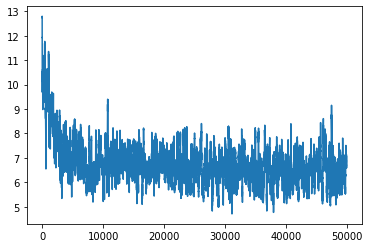

Testing:
0*0 is 0 and net says [-23.116898]
0*0.5 is 0.0 and net says [-21.040089]
0*1.0 is 0.0 and net says [-18.963278]
0*2.0 is 0.0 and net says [-14.80966]
0*3.0 is 0.0 and net says [-10.656042]
0*4.0 is 0.0 and net says [-6.5024233]
0.5*0 is 0.0 and net says [-20.506601]
0.5*0.5 is 0.25 and net says [-18.429792]
0.5*1.0 is 0.5 and net says [-16.352982]
0.5*2.0 is 1.0 and net says [-12.199364]
0.5*3.0 is 1.5 and net says [-8.045746]
0.5*4.0 is 2.0 and net says [-3.892127]
1.0*0 is 0.0 and net says [-17.896305]
1.0*0.5 is 0.5 and net says [-15.819496]
1.0*1.0 is 1.0 and net says [-13.742686]
1.0*2.0 is 2.0 and net says [-9.589067]
1.0*3.0 is 3.0 and net says [-5.43545]
1.0*4.0 is 4.0 and net says [-1.2818313]
2.0*0 is 0.0 and net says [-12.675713]
2.0*0.5 is 1.0 and net says [-10.598904]
2.0*1.0 is 2.0 and net says [-8.522094]
2.0*2.0 is 4.0 and net says [-4.368476]
2.0*3.0 is 6.0 and net says [-0.21485746]
2.0*4.0 is 8.0 and net says [3.9387608]
3.0*0 is 0.0 and net says [-7.45512]

In [30]:
my_net1 = net1(2,100,1)
learn(net=my_net1, nr_train_steps=50000)